<h1>Exploratory Data Analysis</h1>

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. (Wikipedia)

Personalidades: John Tukey (criador do Box Plot) e Hans Rosling (Gapminder).

<h3>Fontes:</h3>
<ul>
    <li>https://seaborn.pydata.org/examples/index.html</li>
    <li>https://matplotlib.org/gallery.html</li>
    <li>https://bokeh.pydata.org/en/latest/docs/gallery.html</li>
    <li>https://plot.ly/python/</li>
</ul>

<h3>Qual gráfico escolher?</h3>
<img src="many1.jpeg"></img>

<h3>5 simples e bem usados:</h3> 
<ul>
    <li>Linha</li>
    <li>Barra</li>
    <li>Dispersão</li>
    <li>Box Plot</li>
    <li>Histograma</li>
</ul>
Fonte: https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f    

<h3>Outros tipos de gráficos</h3>
<img src="many2.png"></img>

<h3>Bibliotecas para esse projeto</h3>

In [1]:
import pandas as pd
import numpy as np
import scipy

from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook, curdoc, output_file
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.widgets import Tabs, Panel, Slider, TextInput
from bokeh.layouts import gridplot, row, column, widgetbox

import plotly.offline as py
import plotly.graph_objs as go
from plotly.grid_objs import Grid, Column

from sklearn import datasets

py.init_notebook_mode(connected=True)
%matplotlib inline

<h3>Os datasets</h3>

Para essa primeira parte ilustraremos códigos de gráficos de barra, linha, dispersão, além de histogramas e boxplots utilizando os pacotes mais famosos Matplotlib, Seaborn, Plotly e Bokeh. Os datasets escolhidos para esse trabalho serão o Titanic (df) e Iris (iris).

<h4>Titanic</h4>

In [2]:
df = pd.read_csv('train.csv')
df = df[['Sex','Age','Fare','Embarked','Survived']]
df.Age.fillna(df.Age.mean(),inplace=True)
df.Embarked.fillna('S',inplace=True)
df['Survived'] = df['Survived'].map({0:'Died',1:'Survived'})

<h4>Iris</h4>

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris = pd.DataFrame(X, columns=iris.feature_names)
iris['Species'] = y

<h2>Gráfico de linha</h2>

<h3>Gráfico de linha no matplotlib</h3>

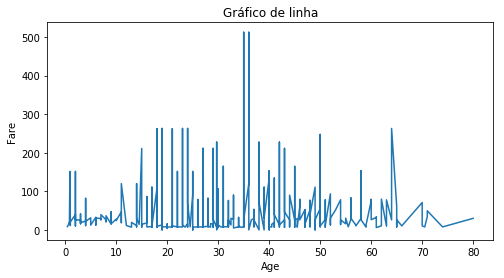

In [4]:
result = df.sort_values(by=['Age'])

plt.figure(figsize=(8,4))

plt.plot(result['Age'],result['Fare'])

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Gráfico de linha")

plt.show()

<h3>Gráfico de linha no seaborn</h3>

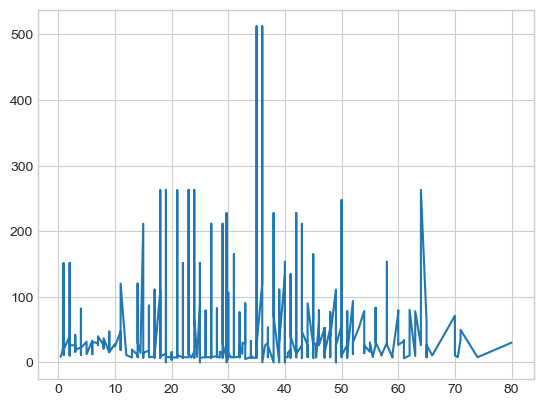

In [5]:
# gráfico da função de cumulação
plt.rcdefaults()

sns.set_style("whitegrid")

plt.plot(result['Age'],result['Fare'])
plt.show()

Muito parecido com o gráfico de linha, existe o gráfico de ponto para visualização de padrões em dados categóricos.

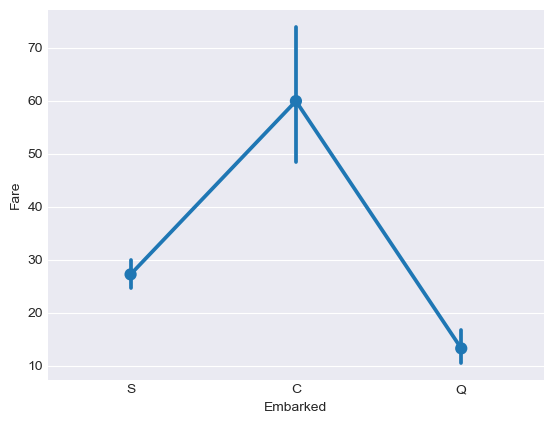

In [6]:
plt.rcdefaults()

sns.set_style("darkgrid")

ax = sns.pointplot(x="Embarked", y="Fare", data=df)

plt.show()

<h3>Gráfico de linha no Bokeh</h3>

In [7]:
output_notebook()

p = figure(plot_width=400, plot_height=400)

# add a line renderer
p.line(result['Age'], result['Fare'], line_width=2)

show(p)

Loading BokehJS ...

<h3>Gráfico de linha no Plotly</h3>

In [8]:
trace1 = go.Scatter(
    x=result['Age'],
    y=result['Fare'],
    name = '<b>No</b> Gaps', # Style name/legend entry with html tags
    connectgaps=True
)

data = [trace1]

py.iplot(data, filename='basic-line')

<h2>Gráfico de barras</h3>

<h3>Exemplos de gráficos de barra no matplotlib</h3>

Bom para visualizações de dados categóricos. No nosso dataset temos dois tipos de dados categóricos: Sex (sexo) e Embarked (Portão de embarque).

In [9]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

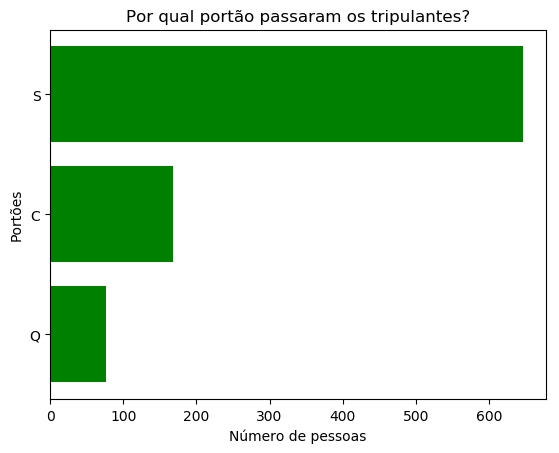

In [10]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
embarked = ('S', 'C', 'Q')
y_pos = np.arange(len(embarked))
performance = [646,168,77]

ax.barh(y_pos, performance, align='center',color='green')

ax.set_yticks(y_pos)
ax.set_yticklabels(embarked)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Número de pessoas')
ax.set_ylabel('Portões')
ax.set_title('Por qual portão passaram os tripulantes?')

plt.show()

Uma alternativa ao gráfico de barras é o gráfico de pizza.

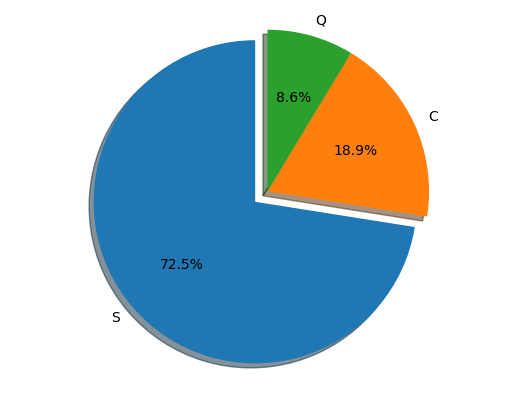

In [11]:
labels = ('S', 'C', 'Q')
sizes = [646,168,77]
explode = (0.1, 0, 0)  # only "explode" the 1nd slice (i.e. 'S')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

No próximo exemplo um gráfico de barra horizontal.

In [12]:
df[df['Sex']=='male']['Embarked'].value_counts()

S    441
C     95
Q     41
Name: Embarked, dtype: int64

In [13]:
df[df['Sex']=='female']['Embarked'].value_counts()

S    205
C     73
Q     36
Name: Embarked, dtype: int64

Como escolher as cores:<br/>
https://blog.graphiq.com/finding-the-right-color-palettes-for-data-visualizations-fcd4e707a283<br/>
http://colorhunt.co/

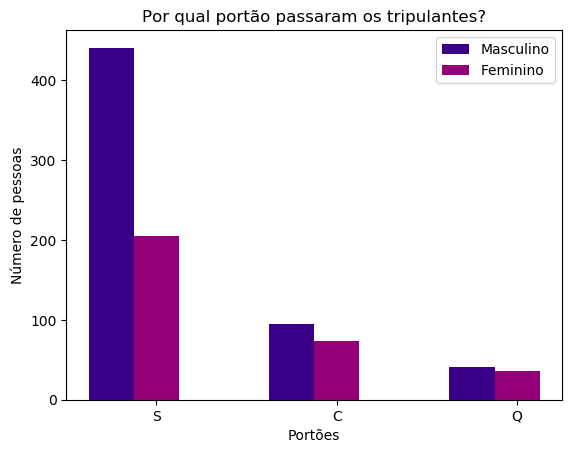

In [14]:
plt.rcdefaults()
fig, ax = plt.subplots()

x = np.arange(3)
males = [441,95,41]
females = [205,73,36]
width = 0.25

ax.bar(x, males, width, color='#3a0088', label="Masculino")
ax.bar(x + width, females, width, color='#930077', label="Feminino")

ax.set_xticks(x + width)
ax.set_xticklabels(['S', 'C', 'Q'])
ax.set_xlabel("Portões")
ax.set_ylabel("Número de pessoas")
ax.set_title("Por qual portão passaram os tripulantes?")
ax.legend(loc = 'upper right')

plt.show()

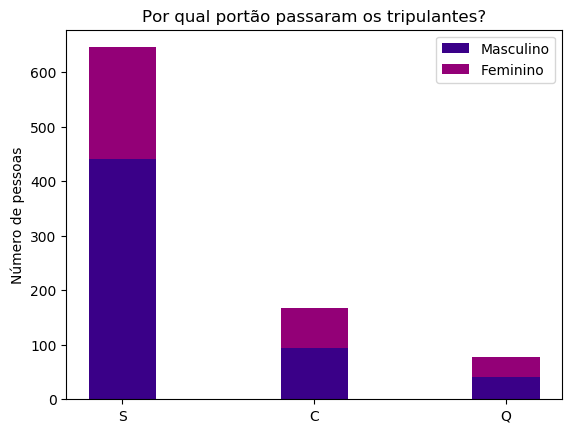

In [15]:
plt.rcdefaults()

N = 3
males = [441,95,41]
females = [205,73,36]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, males, width, color='#3a0088')
p2 = plt.bar(ind, females, width, color='#930077', bottom=males)

plt.ylabel('Número de pessoas')
plt.title('Por qual portão passaram os tripulantes?')
plt.xticks(ind, ('S', 'C', 'Q'))
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Masculino', 'Feminino'))

plt.show()

<h3>Exemplos de gráficos de barra no Seaborn</h3>

Fonte: https://seaborn.pydata.org/generated/seaborn.barplot.html

Observe que no próximo gráfico podemos visualizar 4 características do conjunto de dados simultaneamente, sendo 3 categóricas e uma inteira.

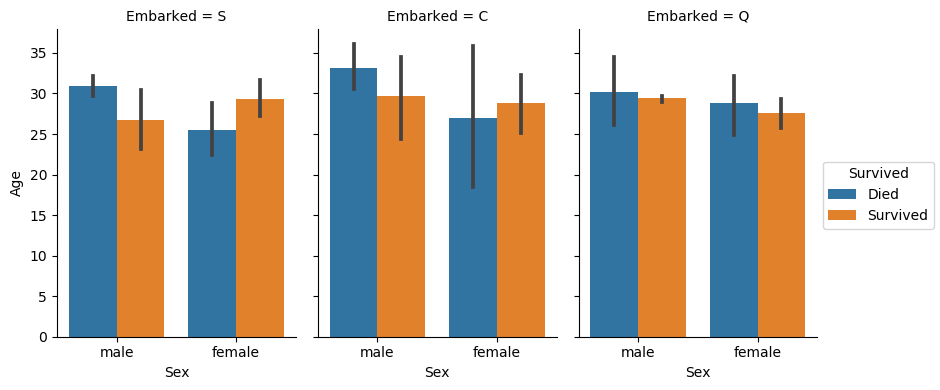

In [16]:
plt.rcdefaults()

g = sns.factorplot(
    x="Sex", 
    y="Age", 
    hue="Survived", 
    col="Embarked", 
    data=df, 
    kind="bar", 
    size=4, 
    aspect=.7)
plt.show()

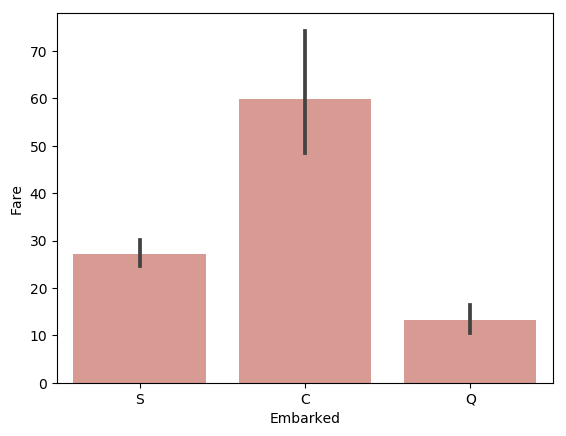

In [17]:
plt.rcdefaults()

ax = sns.barplot("Embarked", y="Fare", data=df, color="salmon", saturation=.5)
plt.show()

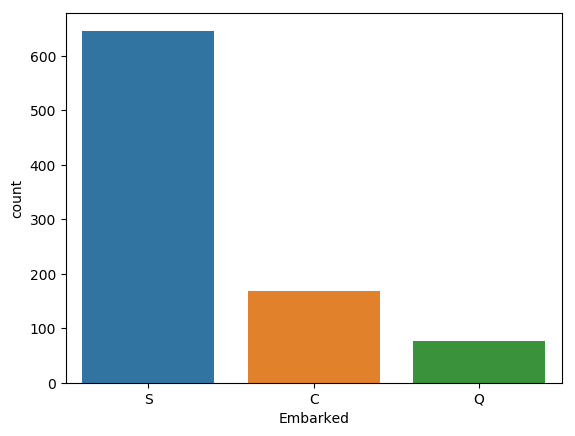

In [18]:
plt.rcdefaults()

ax = sns.countplot(
    x="Embarked",
    data=df[['Embarked']],
    order = df['Embarked'].value_counts().index)

plt.show()

<h3>Gráfico de barras no Bokeh</h3>

In [19]:
output_notebook()

Loading BokehJS ...

In [20]:
portoes = ['S', 'C', 'Q']
counts = [646,168,77]

source = ColumnDataSource(data=dict(portoes=portoes, counts=counts, color=['#e95280','#23b1a5','#ffdd7e']))

p = figure(x_range=portoes, y_range=(0,700), plot_height=350, title="Por qual portão passaram os tripulantes?",
           toolbar_location=None, tools="")

p.vbar(x='portoes', top='counts', width=0.9, color='color', legend="portoes", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_right"

In [21]:
show(p)

<h3>Gráfico de barras no plotly</h3>

Fonte: https://plot.ly/python/bar-charts/

In [22]:
trace1 = go.Bar(
    x=['S', 'C', 'Q'],
    y=[441,95,41],
    name='Masculino'
)
trace2 = go.Bar(
    x=['S', 'C', 'Q'],
    y=[205,76,36],
    name='Feminino'
)

data = [trace1, trace2]

layout = go.Layout(
    title='Por qual portão passaram os tripulantes?',
    xaxis=dict(
        title="Portões",
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Número de pessoas',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

<h2>Gráficos de dispersão</h2>

<h3>Gráfico de dispersão com o matplotblib</h3>

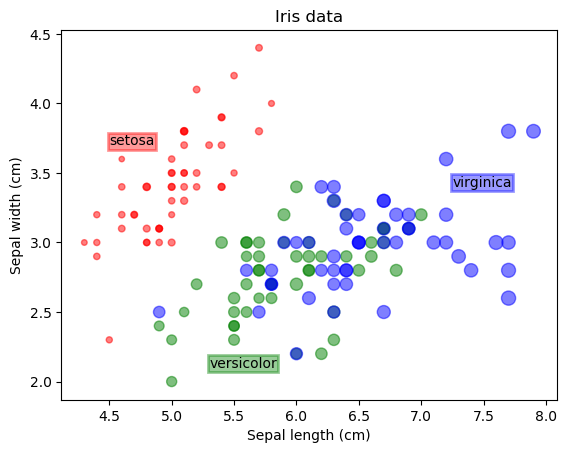

In [23]:
plt.rcdefaults()

colors = 50*['red']+50*['green']+50*['blue']
area = iris['petal length (cm)']*15

xdata = iris['sepal length (cm)']
ydata = iris['sepal width (cm)']

plt.scatter(x=xdata, y=ydata, s=area, c=colors, alpha=0.5)
plt.title('Iris data')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

# anotações: https://matplotlib.org/users/annotations.html#annotating-with-text-with-box
bbox_props_setosa = dict(boxstyle="square,pad=0.1", fc="red", ec="r", lw=2, alpha=0.4)
plt.annotate('setosa',xy=(4.5,3.7),size=10,bbox=bbox_props_setosa)
bbox_props_virginica = dict(boxstyle="square,pad=0.1", fc="blue", ec="b", lw=2, alpha=0.4)
plt.annotate('virginica',xy=(7.25,3.4),size=10, bbox=bbox_props_virginica)
bbox_props_versicolor = dict(boxstyle="square,pad=0.1", fc="green", ec="g", lw=2, alpha=0.4)
plt.annotate('versicolor',xy=(5.3,2.1),size=10, bbox=bbox_props_versicolor)

plt.show()

<h3>Gráfico de dispersão com o Seaborn</h3>

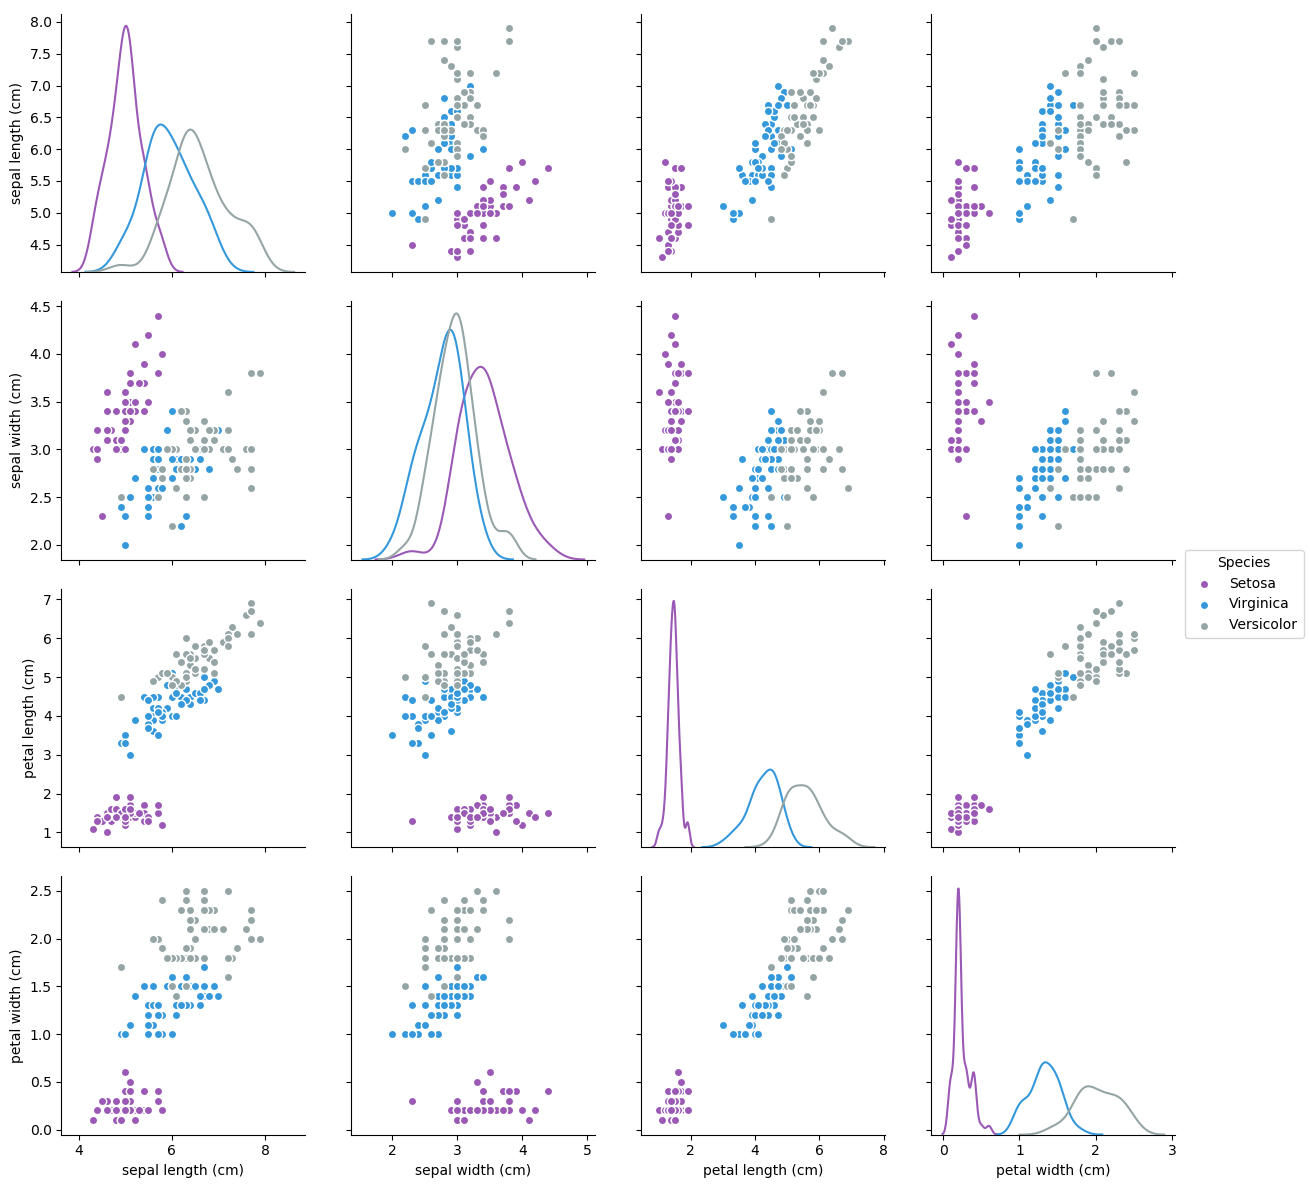

In [24]:
plt.rcdefaults()

iris['Species'] = 50*['Setosa'] + 50*['Virginica'] + 50*['Versicolor']

# Escolhendo as cores
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# criando gráfico para visualização de relações de 2 a 2 features
sns.pairplot(iris,
             hue='Species',
             palette=flatui,
             vars = [
                 'sepal length (cm)',
                 'sepal width (cm)',
                 'petal length (cm)',
                 'petal width (cm)'
             ],
             size=3,
             diag_kind="kde") # can be hist

plt.show()

Possível fazer gráficos já com regressão linear:

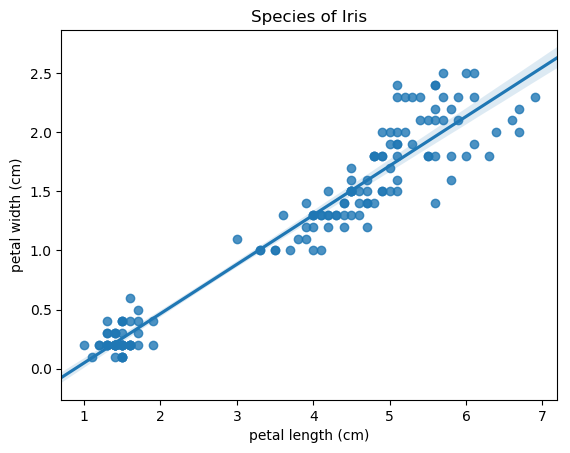

In [25]:
ax = sns.regplot(x="petal length (cm)", y="petal width (cm)", data=iris)
ax.set_title("Species of Iris")
plt.show()

<h3>Gráfico de Dispersão no Bokeh</h3>

In [26]:
output_notebook()

Loading BokehJS ...

In [27]:
p = figure(title="Gráfico de dispersão: Idade vs Tarifa",
           x_axis_label='Idade',
           y_axis_label='Tarifa')

p.circle(df['Age'],df['Fare'],fill_alpha=0.6,line_color=None)

GlyphRenderer(id='9bb55e3a-ebc5-4643-96b7-95c219224f83', ...)

In [28]:
show(p)

In [29]:
colormap = {'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'}
iris['color'] = iris['Species'].map(lambda x: colormap[x])

p = figure(title = "Iris Morphology", tools='box_select,lasso_select,pan,wheel_zoom,box_zoom,reset')
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(iris["petal length (cm)"],
         iris["petal width (cm)"],
         color=iris["color"],
         selection_color='#9b59b6',
         nonselection_fill_alpha=0.2,
         nonselection_fill_color='grey',
         fill_alpha=0.2,
         size=10)

show(p)

<h3>Gráfico de dispersão no plotly</h3>

Fonte: https://plot.ly/python/line-and-scatter/

In [30]:
trace = go.Scatter(x=iris["petal length (cm)"],
                   y=iris["petal width (cm)"],
                   mode='markers',
                   marker=dict(color=50*['#e95280']+50*['#23b1a5']+50*['#ffdd7e'],
                               size=10,
                               colorscale='Viridis',
                               showscale=False))

layout = go.Layout(title='Species of Iris',
                   xaxis=dict(title='Petal length',
                            showgrid=False),
                   yaxis=dict(title='Petal width',
                            showgrid=False),
                  )
 
fig = go.Figure(data=[trace], layout=layout)

py.iplot(fig, filename='iris-scatter')

In [31]:
trace = go.Scatter3d(x=iris['sepal length (cm)'], 
                     y=iris['sepal width (cm)'], 
                     z=iris['petal length (cm)'],
                     mode='markers',
                     marker=dict(
                         size=6,
                         color=50*['#e95280']+50*['#23b1a5']+50*['#ffdd7e'],
                         colorscale='Viridis',   
                         opacity=0.5)
                    )
layout=go.Layout(title='Species of Iris',
                 scene=dict(
                         xaxis=dict(title='Sepal Length'),
                         yaxis=dict(title='Sepal Width'),
                         zaxis=dict(title='Petal Length'))
                 )
fig = go.Figure(data=[trace], layout=layout)

py.iplot(fig, filename='iris-scatter')

<h2>Histogramas</h2>

<h3>Histogramas no matplotlib</h3>

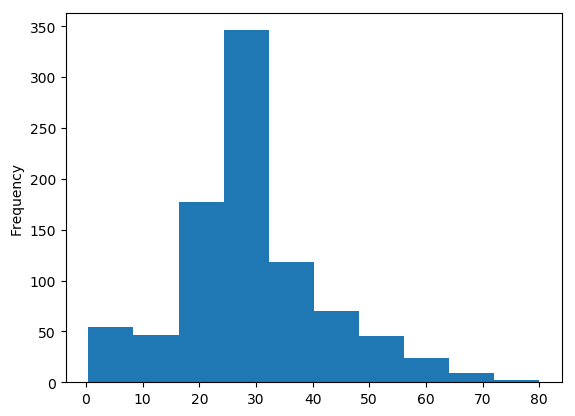

In [32]:
plt.rcdefaults()

# a simple way
df['Age'].plot(kind='hist')
plt.show()

In [33]:
mu, sigma = np.mean(df['Age']), np.std(df['Age'])
print(mu, sigma)

29.699117647058763 12.994716872789033


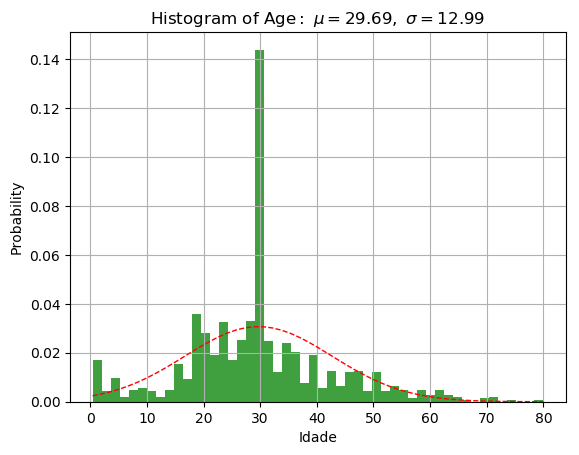

In [34]:
plt.rcdefaults()

x = df['Age']

# the histogram of the data
n, bins, patches = plt.hist(x, bins=50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Idade')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Age:}\ \mu=29.69,\ \sigma=12.99$')
plt.grid(True)

plt.show()

<h3>Histogramas no Seaborn</h3>

Fonte: https://seaborn.pydata.org/tutorial/distributions.html

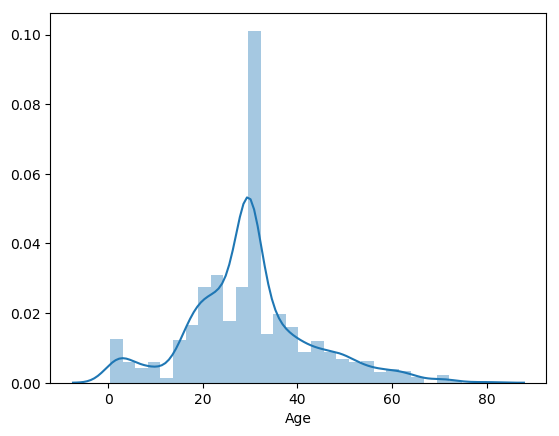

In [35]:
plt.rcdefaults()

sns.distplot(df['Age'])
plt.show()

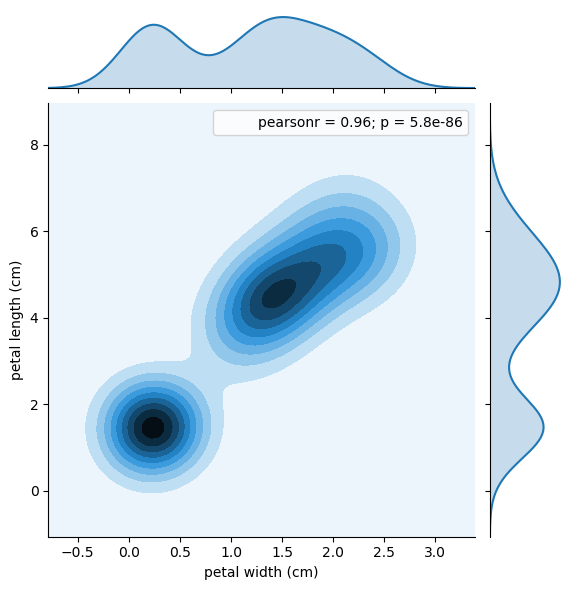

In [36]:
sns.jointplot(x="petal width (cm)", y="petal length (cm)", data=iris, kind="kde")
plt.show()

<h3>Histogramas no bokeh</h3>

Fonte: https://bokeh.pydata.org/en/latest/docs/gallery/histogram.html

In [37]:
p = figure(title="Normal Distribution (μ=0, σ=0.5)",tools="save",
            background_fill_color="#E8DDCB")

mu, sigma = np.mean(iris['sepal length (cm)']), np.std(iris['sepal length (cm)'])

iris_sepal_length = iris['sepal length (cm)']
hist, edges = np.histogram(iris_sepal_length, density=True, bins=50)

x = np.linspace(4, 8, 1000)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p.legend.location = "center_right"
p.legend.background_fill_color = "darkgrey"
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'

show(p)

<h3>Histogramas no plotly</h3>

Fonte: https://plot.ly/python/histograms/

In [38]:
x0 = iris[iris['Species']=='Virginica']['sepal length (cm)']
x1 = iris[iris['Species']=='Versicolor']['sepal length (cm)']

In [39]:
trace1 = go.Histogram(
    x=x0,
    histnorm='count',
    name='Virginica',
    xbins=dict(
        start=np.min(x0),
        end=np.max(x0),
        size=0.2
    ),
    marker=dict(
        color='#FFD7E9',
    ),
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='Versicolor',
    xbins=dict(
        start=np.min(x1),
        end=np.max(x1),
        size=0.2
    ),
    marker=dict(
        color='#EB89B5'
    ),
    opacity=0.75
)
data = [trace1, trace2]

layout = go.Layout(
    title='Histograma',
    xaxis=dict(
        title='Comprimento da sépala'
    ),
    yaxis=dict(
        title='Frequência'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

<h2>BoxPlot</h2>

<img src='boxplot.png'></img>
Fonte: https://biostats.w.uib.no/9-how-to-draw-a-boxplot/

<h3>Boxplot no matplotlib</h3>

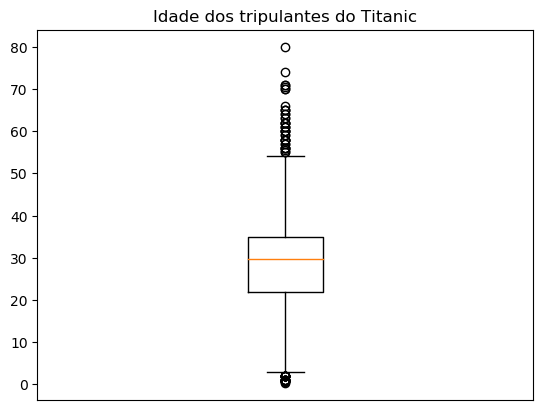

In [40]:
plt.rcdefaults()

plt.boxplot(df['Age'])
plt.title("Idade dos tripulantes do Titanic")

# remove xticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.show()

<h3>Boxplot no Seaborn</h3>

Fonte: https://seaborn.pydata.org/generated/seaborn.boxplot.html

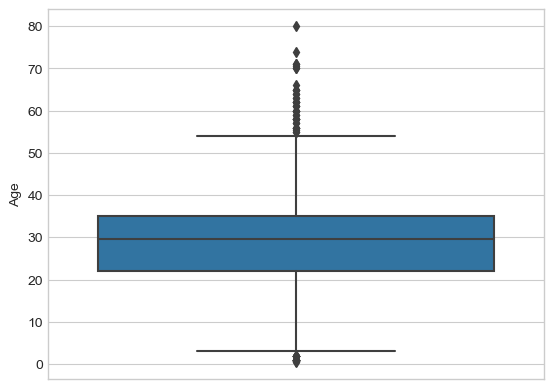

In [41]:
plt.rcdefaults()

sns.set_style("whitegrid")

ax = sns.boxplot(y=df["Age"])
plt.show()

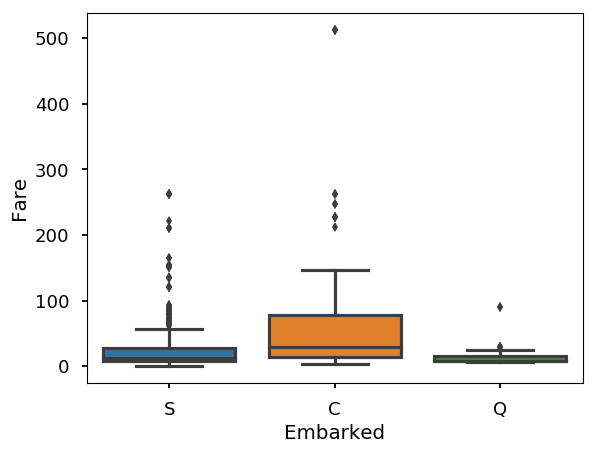

In [42]:
plt.rcdefaults()

sns.set_context("talk")

ax = sns.boxplot(x="Embarked", y="Fare", data=df)

plt.show()

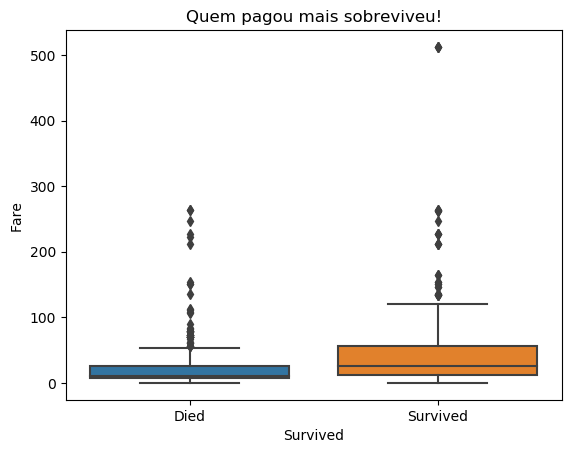

In [43]:
plt.rcdefaults()

ax = sns.boxplot(x="Survived", y="Fare", data=df)
ax.set_title("Quem pagou mais sobreviveu!")

plt.show()

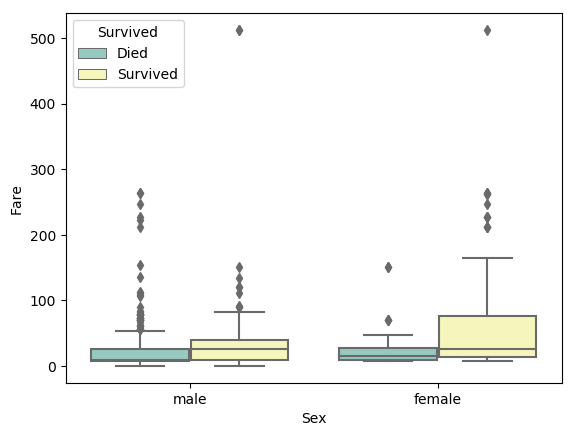

In [44]:
plt.rcdefaults()

ax = sns.boxplot(x="Sex", y="Fare", hue="Survived", data=df, palette="Set3")

plt.show()

Violin e swarm plots também são boas alternativas.

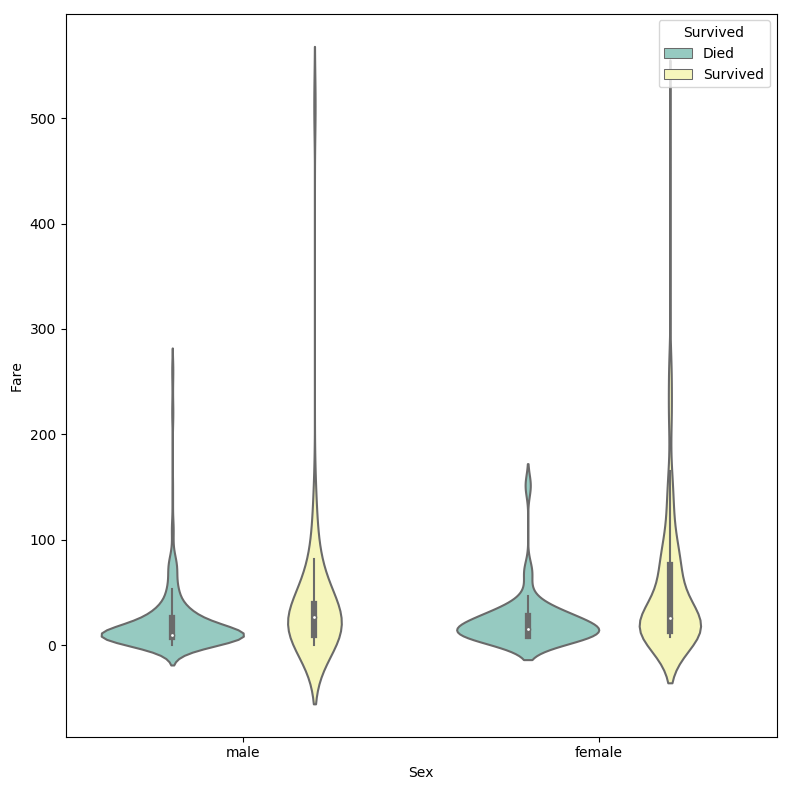

In [45]:
# violin plot
plt.rcdefaults()

plt.figure(figsize=(8,8))

sns.violinplot(x="Sex", y="Fare", hue="Survived", data=df, palette="Set3")

plt.tight_layout() 
plt.show()

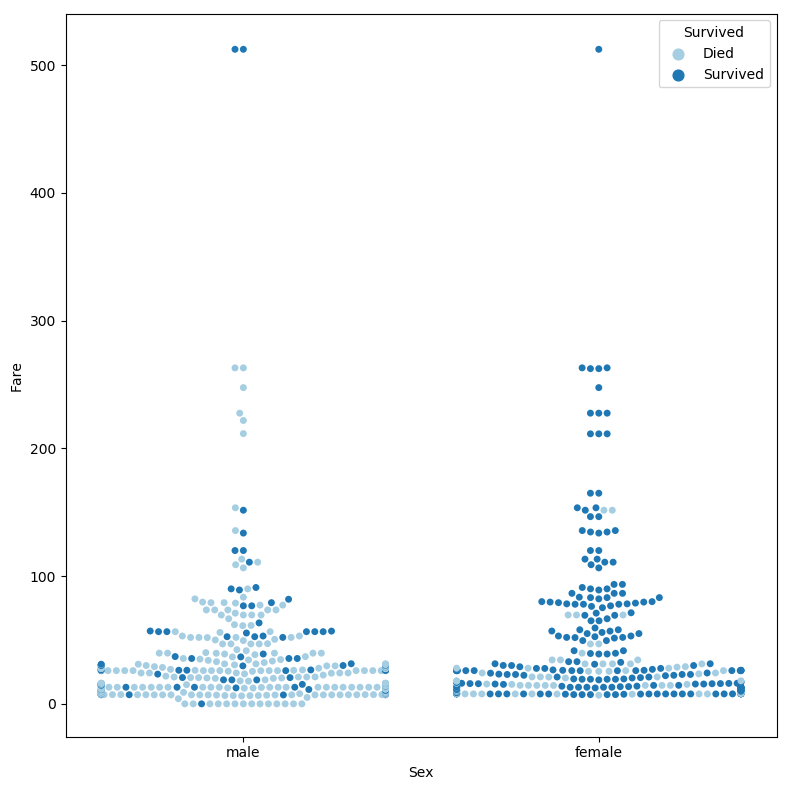

In [46]:
# swarm plot
plt.rcdefaults()

plt.figure(figsize=(8,8))

sns.set_palette("Paired")

sns.swarmplot(x="Sex", y="Fare", hue="Survived", data=df)

plt.tight_layout() 
plt.show()

<h3>Boxplot no Bokeh</h3>

Não é uma boa ideia!!! 

<h3>Boxplot no plotly</h3>

Fonte: https://plot.ly/python/box-plots/

In [47]:
x_data = ['S', 'C', 'Q',]

y0 = df[df['Embarked']=='S'].Fare
y1 = df[df['Embarked']=='C'].Fare
y2 = df[df['Embarked']=='Q'].Fare


y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)']

traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Por qual portão passaram os tripulantes?',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        autotick=True,
        ticks='',
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

<h2>Outros tipos de gráficos</h2>

<h3>Mosaic plot</h3>

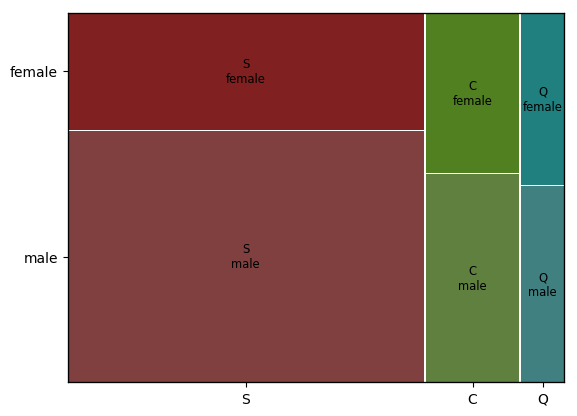

In [48]:
mosaic(df, ['Embarked', 'Sex'])
plt.show()

<h3>Heatmap</h3>

<h3>Criando tabelas cruzadas</h3>

In [49]:
myCrosstable = pd.crosstab(df['Embarked'], df['Sex'])
myCrosstable

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,205,441


In [50]:
myCrosstable.values

array([[ 73,  95],
       [ 36,  41],
       [205, 441]], dtype=int64)

In [51]:
myCrosstable.index

Index(['C', 'Q', 'S'], dtype='object', name='Embarked')

In [52]:
myCrosstable.columns

Index(['female', 'male'], dtype='object', name='Sex')

<h3>Tabelas cruzadas com funções</h3>

In [53]:
# porcentagem
perc_crosstab = pd.crosstab(df['Embarked'], df['Sex']).apply(lambda r: r/r.sum(), axis=1)
perc_crosstab

Sex,female,male
Embarked,,
C,0.434524,0.565476
Q,0.467532,0.532468
S,0.317337,0.682663


In [54]:
# correlation
corr_crosstab = iris.corr()
corr_crosstab

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


In [55]:
# mean 
mean_crosstab = pd.pivot_table(df, values='Fare', index=['Sex', 'Embarked'],columns=['Survived'], aggfunc=np.mean)
mean_crosstab

Survived              Died   Survived
Sex    Embarked                      
female C         16.215278  83.460286
       Q         10.904633  13.211733
       S         25.728508  45.095158
male   C         38.065342  71.468545
       Q         13.911732  12.916667
       S         19.881281  30.366286

In [56]:
# mean 
mean_crosstab_sex_embarked = pd.pivot_table(df, values='Fare', index=['Embarked'],columns=['Sex'], aggfunc=np.mean)
mean_crosstab_sex_embarked

Sex,female,male
Embarked,,
C,75.169805,48.262109
Q,12.634958,13.838922
S,39.143456,21.711996


<h3>Heatmap com Seaborn</h3>

Fonte: https://seaborn.pydata.org/generated/seaborn.heatmap.html

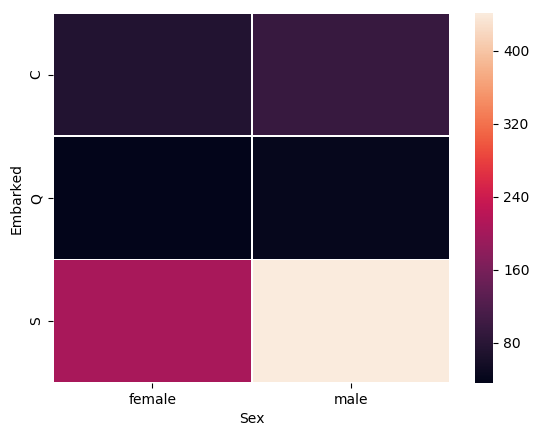

In [57]:
plt.rcdefaults()

ax = sns.heatmap(myCrosstable, linewidths=.5)
plt.show()

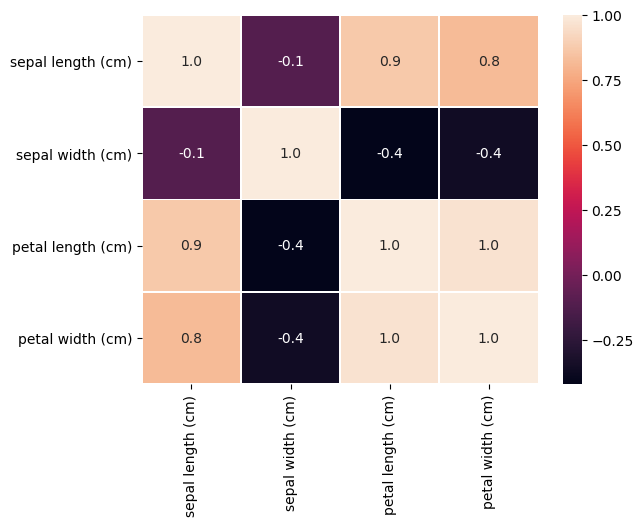

In [58]:
# heatmap of correlations
corr = iris.corr()
sns.heatmap(corr,
            linewidths=.5,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".1f")
plt.show()

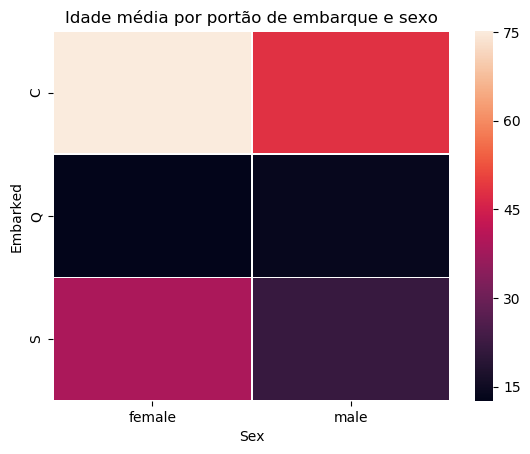

In [59]:
plt.rcdefaults()

ax = sns.heatmap(mean_crosstab_sex_embarked, linewidths=.5 )
# cmap can be "BuPu" "Blues" "YlGnBu" "Greens"
ax.set_title("Idade média por portão de embarque e sexo")
plt.show()

<h3>Heatmap com plotly</h3>

In [60]:
trace = go.Heatmap(z=myCrosstable.values,
                   x=list(myCrosstable.columns),
                   y=list(myCrosstable.index))
data=[trace]
py.iplot(data, filename='labelled-heatmap')

<h3>Chord</h3>

O que é:<br/>
http://circos.ca/presentations/articles/vis_tables1/<br/>
https://www.visualcinnamon.com/2015/08/stretched-chord.html

Criando grafos com networkx:

In [61]:
import networkx as nx

# criando o grafo
G = nx.Graph() # para orientados usar G = nx.DiGraph(), G = nx.MultiGraph()

# adicionando nós
G.add_nodes_from(list(range(101)))
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [62]:
G.add_edge(1,2)
G.edges

EdgeView([(1, 2)])

In [63]:
import random
E = []
for i in range(30):
    x = random.randint(1,51)
    y = random.randint(1,51)
    E.append((x,y))

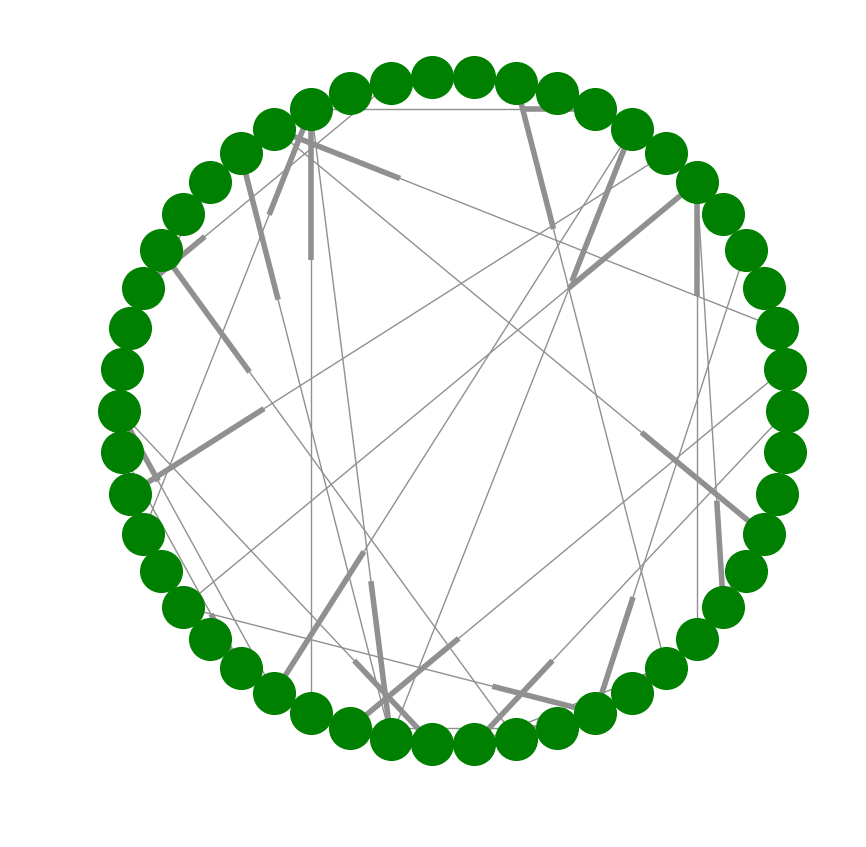

In [64]:
G=nx.DiGraph()
G.add_nodes_from(range(1,51))
G.add_edges_from(E)

plt.figure(figsize=(8,8))            
nx.draw_circular(G,node_color='g', edge_color='#909090', node_size=900)
plt.axis('equal')
plt.show()

<h3>Colormap</h3>

Possíveis fontes:<br/>
https://yangtavares.com/2017/10/22/analyzing-the-state-of-the-basic-health-units-of-brazil-ubs-using-python-for-data-science/<br/>
https://www.kaggle.com/tonionca/terrorist-attacks-in-brazil-1970-2015<br/>
https://ocefpaf.github.io/python4oceanographers/blog/2013/08/12/brazil-states-map/

Não deu tempo!!! ¯\\(ツ)/¯

<h3>Radar plot</h3>

In [65]:
data = [
    go.Scatterpolar(
      r = [441,95,41],
      theta = ['S','C','Q'],
      fill = 'toself',
      name = 'Male'
    ),
    go.Scatterpolar(
      r = [205,76,36],
      theta = ['S','C','Q'],
      fill = 'toself',
      name = 'Female'
    )
]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 500]
    )
  ),
  showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = "radar/multiple")

<h2>Vários gráficos juntos numa mesma figura</h2>

<h3>Matplotlib e Seaborn</h3>

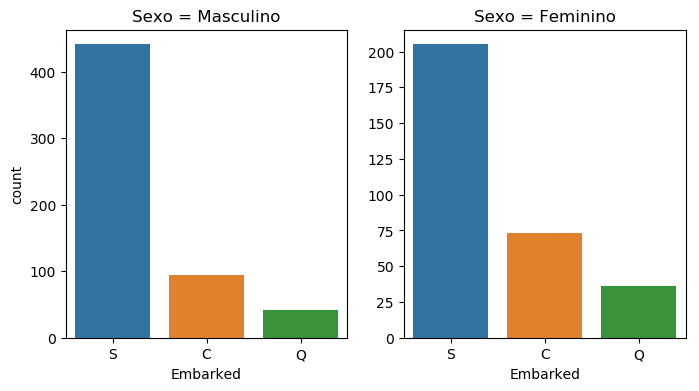

In [66]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='Embarked', data=df[df['Sex']=='male'][['Embarked']],order = df['Embarked'].value_counts().index)
ax1.set_title("Sexo = Masculino")
plt.subplot(1,2,2)
ax2 = sns.countplot(x="Embarked", data=df[df['Sex']=='female'][['Embarked']],order = df['Embarked'].value_counts().index)
ax2.set_title("Sexo = Feminino")
ax2.set_ylabel("")
plt.show()

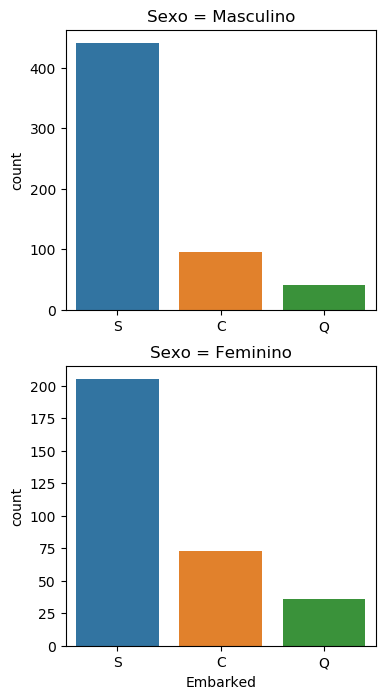

In [67]:
plt.figure(figsize=(4,8))
plt.subplot(2,1,1)
ax1 = sns.countplot(x='Embarked', data=df[df['Sex']=='male'][['Embarked']],order = df['Embarked'].value_counts().index)
ax1.set_title("Sexo = Masculino")
ax1.set_xlabel("")
plt.subplot(2,1,2)
ax2 = sns.countplot(x="Embarked", data=df[df['Sex']=='female'][['Embarked']],order = df['Embarked'].value_counts().index)
ax2.set_title("Sexo = Feminino")
plt.show()

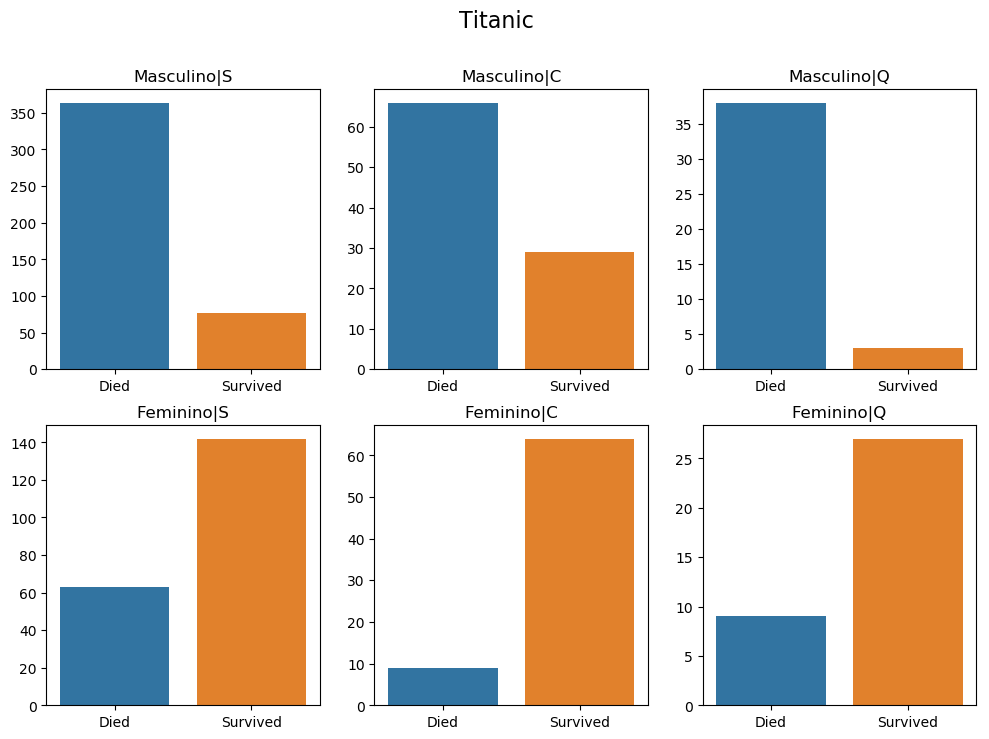

In [68]:
f = plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
ax1 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'male') & (df['Embarked'] == 'S' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax1.set_title("Masculino|S")
ax1.set_xlabel("")
ax1.set_ylabel("")
plt.suptitle('Titanic', fontsize=16)

plt.subplot(2,3,2)
ax2 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'male') & (df['Embarked'] == 'C' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax2.set_title("Masculino|C")
ax2.set_xlabel("")
ax2.set_ylabel("")

plt.subplot(2,3,3)
ax3 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'male') & (df['Embarked'] == 'Q' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax3.set_title("Masculino|Q")
ax3.set_xlabel("")
ax3.set_ylabel("")

plt.subplot(2,3,4)
ax4 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'female') & (df['Embarked'] == 'S' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax4.set_title("Feminino|S")
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.subplot(2,3,5)
ax5 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'female') & (df['Embarked'] == 'C' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax5.set_title("Feminino|C")
ax5.set_xlabel("")
ax5.set_ylabel("")

plt.subplot(2,3,6)
ax6 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'female') & (df['Embarked'] == 'Q' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax6.set_title("Feminino|Q")
ax6.set_xlabel("")
ax6.set_ylabel("")

plt.show()

<h3>Bokeh</h3>

In [69]:
p1 = figure(title='Setosa',plot_width=300,plot_height=200)
p2 = figure(title='Virginica',plot_width=300,plot_height=200)
p3 = figure(title='Versicolor',plot_width=300,plot_height=200)

p1.circle(
    iris[iris['Species']=='Setosa']["petal length (cm)"],
    iris[iris['Species']=='Setosa']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p2.circle(
    iris[iris['Species']=='Virginica']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p3.circle(
    iris[iris['Species']=='Versicolor']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)

p3.x_range = p2.x_range = p1.x_range
p3.y_range = p2.y_range = p1.y_range

layout = row(p1, p2, p3)

show(layout)

In [70]:
p1 = figure(title='Setosa',plot_width=300,plot_height=200)
p2 = figure(title='Virginica',plot_width=300,plot_height=200)
p3 = figure(title='Versicolor',plot_width=300,plot_height=200)

p1.circle(
    iris[iris['Species']=='Setosa']["petal length (cm)"],
    iris[iris['Species']=='Setosa']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p2.circle(
    iris[iris['Species']=='Virginica']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p3.circle(
    iris[iris['Species']=='Versicolor']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)

p3.x_range = p2.x_range = p1.x_range
p3.y_range = p2.y_range = p1.y_range

layout = column(p1, p2, p3)

show(layout)

In [71]:
p1 = figure(title='Setosa',plot_width=300,plot_height=200)
p2 = figure(title='Virginica',plot_width=300,plot_height=200)
p3 = figure(title='Versicolor',plot_width=300,plot_height=200)

p1.circle(
    iris[iris['Species']=='Setosa']["petal length (cm)"],
    iris[iris['Species']=='Setosa']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p2.circle(
    iris[iris['Species']=='Virginica']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p3.circle(
    iris[iris['Species']=='Versicolor']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)

p3.x_range = p2.x_range = p1.x_range
p3.y_range = p2.y_range = p1.y_range

layout = column(row(p1, p2), p3)

show(layout)

In [72]:
p1 = figure(title='Setosa',plot_width=300,plot_height=200)
p2 = figure(title='Virginica',plot_width=300,plot_height=200)
p3 = figure(title='Versicolor',plot_width=300,plot_height=200)

p1.circle(
    iris[iris['Species']=='Setosa']["petal length (cm)"],
    iris[iris['Species']=='Setosa']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p2.circle(
    iris[iris['Species']=='Virginica']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p3.circle(
    iris[iris['Species']=='Versicolor']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)

p3.x_range = p2.x_range = p1.x_range
p3.y_range = p2.y_range = p1.y_range


layout = gridplot([[None, p1], [p2, p3]], toolbar_location=None)

show(layout)

In [73]:
p1 = figure(title='Setosa',plot_width=300,plot_height=200)
p2 = figure(title='Virginica',plot_width=300,plot_height=200)
p3 = figure(title='Versicolor',plot_width=300,plot_height=200)

p1.circle(
    iris[iris['Species']=='Setosa']["petal length (cm)"],
    iris[iris['Species']=='Setosa']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p2.circle(
    iris[iris['Species']=='Virginica']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)
p3.circle(
    iris[iris['Species']=='Versicolor']["petal length (cm)"],
    iris[iris['Species']=='Virginica']["petal width (cm)"],
    size=12,
    alpha=0.7
)

p3.x_range = p2.x_range = p1.x_range
p3.y_range = p2.y_range = p1.y_range

first = Panel(child=row(p1, p2), title='first')
second = Panel(child=row(p3), title='second')
# Put the Panels in a Tabs object
tabs = Tabs(tabs=[first, second])

show(tabs)

<h3>Plotly</h3>

Fonte: https://plot.ly/python/subplots/

Não deu tempo!!! ¯\\(ツ)/¯

<h2>Animações e ferramentas</h2>

<h3>Matplotlib</h3>

Não deu tempo!!! ¯\\(ツ)/¯

<h3>Bokeh</h3>

Para as animações com Bokeh é necessário iniciar um servidor local.

In [74]:
# cuidado com esse comando, vc terá que resetar seu jupyter notebook
# melhor executá-lo do prompt do anaconda
# !bokeh serve --show my_script.py

<h3>Plotly</h3>

Não deu tempo!!! ¯\\(ツ)/¯